In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import os
from tqdm import tqdm

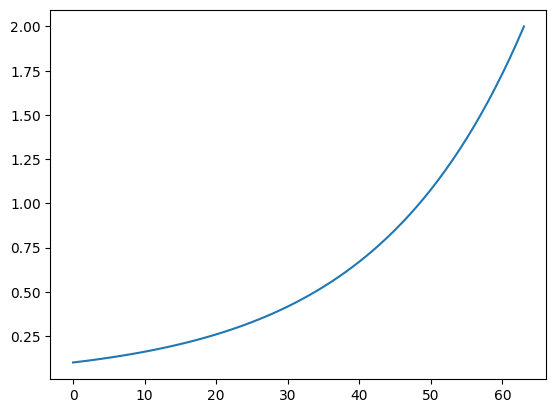

In [2]:
start = 0.1
end = 2.0

inv_ks = list(np.exp(np.linspace(np.log(start),np.log(end),64)))
              
plt.plot(inv_ks)
plt.show()

In [3]:
L = 8

all_ts = []
all_invks = [inv_ks]

n_loops = 100
for i in tqdm(range(n_loops)):
    movement_rate = 0.5 * (float(n_loops - i)/n_loops) + 0.05 * float(i)/n_loops
    vns = np.einsum("i,j->ij", inv_ks, [(n**2) for n in range(200)])

    graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns.astype(np.float32))
    graph.simulate(1000,10,run_parallel_tempering=True)
    ts = graph.get_parallel_tempering_success_rate()
    
    new_invk = [start]
    for i in range(1,len(inv_ks)-1):
        a, b, c = inv_ks[i-1:i+2]
        pab, pbc = ts[i-1], ts[i]
        if pab > pbc:
            b = (1 - movement_rate)*b + (movement_rate)*c
        elif pab < pbc:
            b = (1 - movement_rate)*b + (movement_rate)*a
        
        new_invk.append(b)
    new_invk.append(end)
    
    inv_ks = new_invk
    all_ts.append(ts)
    all_invks.append(inv_ks.copy())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:10<00:00,  9.11s/it]


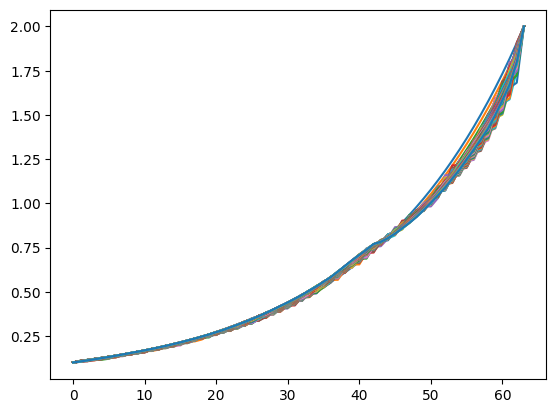

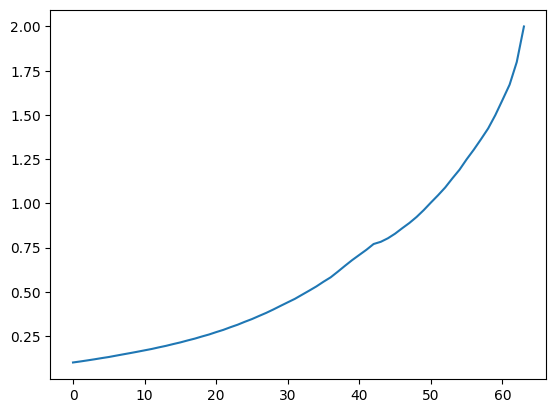

In [6]:
for invks in all_invks:
    plt.plot(invks)
plt.show()

plt.plot(all_invks[-1])
plt.show()

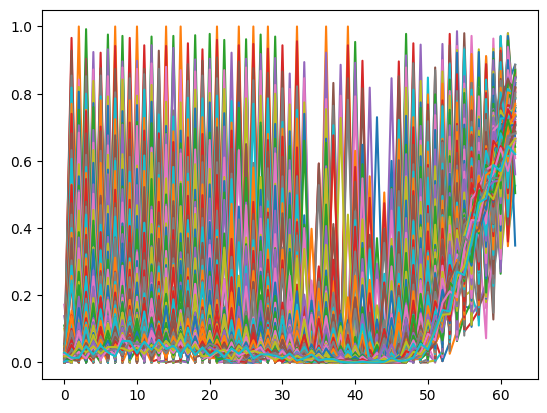

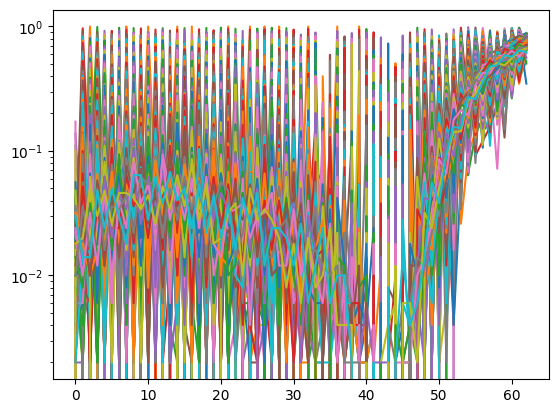

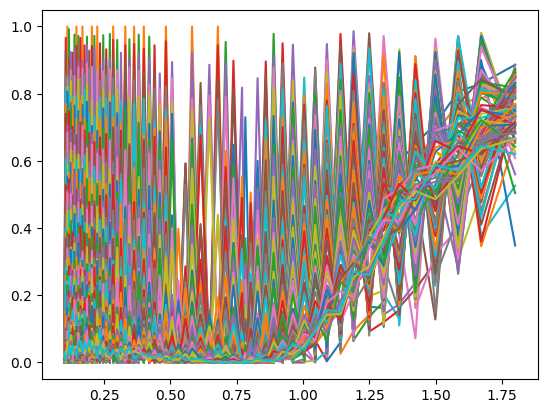

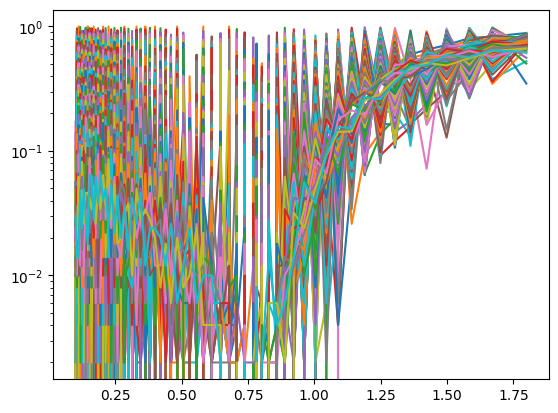

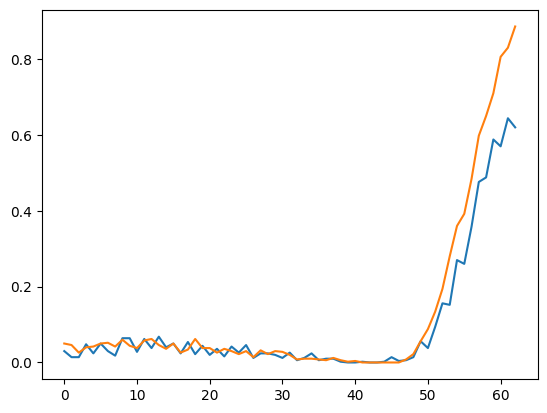

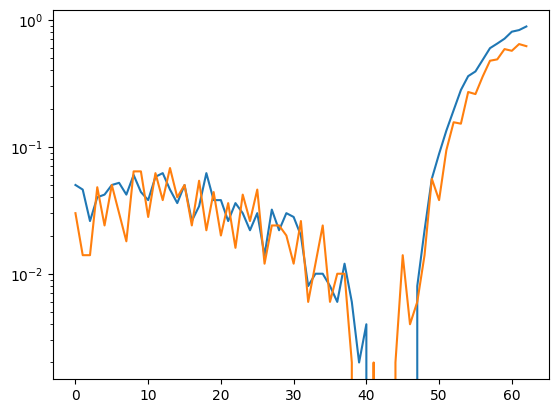

In [8]:
for ts in all_ts:
    plt.plot(ts)
plt.show()

for ts in all_ts:
    plt.plot(ts)
plt.yscale('log')
plt.show()

for ts in all_ts:
    plt.plot(inv_ks[:-1], ts)
plt.show()

for ts in all_ts:
    plt.plot(inv_ks[:-1], ts)
plt.yscale('log')
plt.show()

plt.plot(all_ts[-1])
plt.plot(all_ts[0])
plt.show()

plt.plot(all_ts[0])
plt.plot(all_ts[-1])
plt.yscale('log')
plt.show()